<h2>CS 3780/5780 Creative Project: </h2>
<h3>Emotion Classification of Natural Language</h3>

Names and NetIDs for your group members:

Mary Yuan (cy452)

Noa Kaplan (nk675)

Tejasvi Yadav (ty386)

<h3>Introduction:</h3>

<p> The creative project is about conducting a real-world machine learning project on your own, with everything that is involved. Unlike in the programming projects 1-5, where we gave you all the scaffolding and you just filled in the blanks, you now start from scratch. The past programming projects provide templates for how to do this (and you can reuse part of your code if you wish), and the lectures provide some of the methods you can use. So, this creative project brings realism to how you will use machine learning in the real world.  </p>

The task you will work on is classifying texts to human emotions. Through words, humans express feelings, articulate thoughts, and communicate our deepest needs and desires. Language helps us interpret the nuances of joy, sadness, anger, and love, allowing us to connect with others on a deeper level. Are you able to train an ML model that recognizes the human emotions expressed in a piece of text? <b>Please read the project description PDF file carefully and follow the instructions there. Also make sure you write your code and answers to all the questions in this Jupyter Notebook </b> </p>
<p>


<h2>Part 0: Preliminaries</h2><p>

<h3>0.1 Import:</h3><p>
Please import necessary packages to use. Note that learning and using packages are recommended but not required for this project. Some official tutorial for suggested packacges includes:
    
https://scikit-learn.org/stable/tutorial/basic/tutorial.html
    
https://pytorch.org/tutorials/
    
https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html
<p>

In [ ]:
import os
import pandas as pd
import numpy as np
import torch
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


<h3>0.2 Accuracy:</h3><p>
To measure your performance in the Kaggle Competition, we are using accuracy. As a recap, accuracy is the percent of labels you predict correctly. To measure this, you can use library functions from sklearn. A simple example is shown below.
<p>

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = [3, 2, 1, 0, 1, 2, 3]
y_true = [0, 1, 2, 3, 1, 2, 3]
accuracy_score(y_true, y_pred)

0.42857142857142855

<h2>Part 1: Basics</h2><p>
Note that your code should be commented well and in part 1.4 you can refer to your comments.

<h3>1.1 Load and preprocess the dataset:</h3><p>
We provide how to load the data on Kaggle's Notebook.
<p>

In [ ]:
train = pd.read_csv("/kaggle/input/cs-3780-5780-how-do-you-feel/train.csv")
train_text = train["text"]
train_label = train["label"]

test = pd.read_csv("/kaggle/input/cs-3780-5780-how-do-you-feel/test.csv")
test_id = test["id"]
test_text = test["text"]

Pre-processing training data and splitting

In [ ]:
# changing text data to bag of words
train_text.astype(str)
vectorizer = CountVectorizer()

train_text = vectorizer.fit_transform(train_text)

# put into a pandas dataframe
train_text = pd.DataFrame(train_text.toarray(), columns=vectorizer.get_feature_names_out())

# changing the training dataset to numpy arrays
train_data = np.array(train_text)
label_data = np.array(train_label)

# splitting into train and validation

x_train, x_val, y_train, y_val= train_test_split(train_data,label_data, test_size=0.30, random_state=42)

Pre-processing the test dataset

In [ ]:
#vectorize the test data
test_text.astype(str)
test_text = vectorizer.transform(test_text.astype(str))
test_text = pd.DataFrame(test_text.toarray(), columns=vectorizer.get_feature_names_out())

<h3>1.2 Use At Least Two Training Algorithms from class:</h3><p>
You need to use at least two training algorithms from class. You can use your code from previous projects or any packages you imported in part 0.1.

#####1. Decision Tree Algorithm

In [ ]:
# initiate the decision tree classifier
dtree_unpruned = DecisionTreeClassifier()

# fit the decision tree and predict on the train data to get training accuracy
dtree_unpruned.fit(x_train,y_train)
train_tree_pred = dtree_unpruned.predict(x_train)

# calculate the accuracy score
accuracy = accuracy_score(y_train, train_tree_pred)

# use our decision tree on validation data and calculate its accuracy
val_tree_pred= dtree1.predict(x_val)
val_accuracy = accuracy_score(y_val, val_tree_pred)


#####2. ADABoost



In [ ]:
# initiate classifier
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 10),
    n_estimators = 100
)

# fit the classifier
classifier.fit(x_train, y_train)

# predict the training data and print its accuracy
pt = classifier.predict(x_train)

print("training accuracy: " + str(accuracy_score(y_train, pt)))

# predict the validation data and predict its accuracy
val_preds = classifier.predict(x_val)

print("validation accuracy: " + str(accuracy_score(y_val, val_preds)))

#####3. Linear SVM

In [ ]:
# initiate the model
sv_model = LinearSVC()

# fit the model to test
sv_model.fit(x_train, y_train)

# find the training accuracy
train_sv_pred = sv_model.predict(x_train)
print("training accuracy: " + str(accuracy_score(y_train, train_sv_pred)))

# find the validation accuracy
val_sv_pred = sv_model.predict(x_val)
print("validation accuracy: " + str(accuracy_score(y_val, val_sv_pred)))


#####4. Logistic Regression

In [ ]:
# initialize the model
log_model = LogisticRegression(max_iter=500, random_state=42)

# fit the model to the training data
log_model.fit(x_train, y_train)

# find the training accuracy
train_log_pred = log_model.predict(x_train)
print("training accuracy: " + str(accuracy_score(y_train, train_log_pred)))

# find the validation accuracy
val_log_pred= log_model.predict(x_val)
print("validation accuracy: " + str(accuracy_score(y_val, val_log_pred)))

#####5. Neural Network

In [ ]:
# initialize the model
nn_model = Sequential([
    Dense(512, activation='relu', input_dim=x_train.shape[1]),
    Dropout(0.5),
    Dense(28, activation='softmax')
])

# compile and fit the model
nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn_model.fit(x_train, y_train, epochs=15, batch_size=32)

# find the training accuracy
train_nn = nn_model.predict(x_train)
train_nn_pred = np.argmax(train_nn, axis=1)
print("training accuracy: " + str(accuracy_score(y_train, train_nn_pred)))

# find the validation accuracy
val_nn= nn_model.predict(x_val)
val_nn_pred = np.argmax(val_nn, axis=1)
print("validation accuracy: " + str(accuracy_score(y_val, val_nn_pred)))

<h3>1.3 Training, Validation and Model Selection:</h3><p>
You need to split your data to a training set and validation set or performing a cross-validation for model selection.

In [ ]:
# splitting into train and validation

x_train, x_val, y_train, y_val= train_test_split(train_data,label_data, test_size=0.30, random_state=42)

<h3>1.4 Explanation in Words:</h3><p>
    You need to answer the following questions in the markdown cell after this cell:

####1.4.1 How did you formulate the learning problem?

We found this to be a multi-class classification, as there are 28 emotion classes.

####1.4.2 Which two learning methods from class did you choose and why did you made the choices?

We chose the decision tree algorithm, the adaboost algorithm, the linear support vector machine, logistic regression, and a neural network because we felt that it covered a wide range of learning methods. Since these methods are all very different from each other, we felt that we will discover a model that works well with the dataset out of them.

####1.4.3 How did you do the model selection?

We picked the model based on how well it performed on the validation dataset. Out of the methods we picked, we found that the logistic regression had the best performance on the validation dataset without any tuning.

####1.4.4 Does the test performance reach the first baseline "Tiny Piney"? (Please include a screenshot of Kaggle Submission)

Yes. We managed to surpass the baseline with the logistic regression model, receiving a public accuracy score of 0.6789.

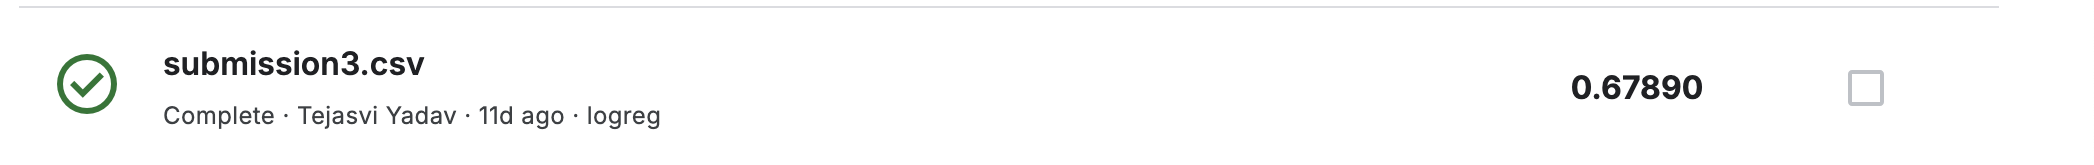

<h2>Part 2: Be creative!</h2><p>

<h3>2.1 Open-ended Code:</h3><p>
You may follow the steps in part 1 again but making innovative changes like using new training algorithms, etc. Make sure you explain everything clearly in part 2.2. Note that beating "Zero Hero" is only a portion of this part. Any creative ideas will receive most points as long as they are reasonable and clearly explained.

#####1. GridSearchCV

In [ ]:
# Trying GridSearchCV to find the optimal hyperparameters
from sklearn.model_selection import GridSearchCV

max_depth = np.arange(200, 290, 10)
print(max_depth)
min_samples_leaf = np.arange(10, 60, 10)
print(min_samples_leaf)
min_samples_split = np.arange(10, 60, 10)
print(min_samples_leaf)

# Define the parameter grid
param_grid = {'criterion':["gini","entropy"],
'max_depth': max_depth,
'min_samples_leaf': min_samples_leaf,
'min_samples_split': min_samples_split}

# Create an instance of the DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Create an instance of the GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Print the best set of hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

#####2. Manual Cross Checking

In [ ]:
#plot what the validation error and train error looks like for different values for max depth
for depth in range(5,287):

    # create a classifier for each depth
    dtree = DecisionTreeClassifier(max_depth=depth)
    depth += 10

    # fit the data
    dtree.fit(x_train,y_train)

    # predict the data
    train_tree_pred_depth = dtree.predict(x_train)

    # compare the training accuracy to the validation accuracy
    train_accuracy = accuracy_score(y_train, train_tree_pred_depth)

    val_tree_pred= dtree.predict(x_val)

    val_accuracy = accuracy_score(y_val, val_tree_pred)

    print(train_accuracy,val_accuracy)

#####3. SVM with Chi-squared reduction



In [ ]:
## SVM with chi feature selection
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest, chi2

# retains the top x features
scaler = SelectKBest(chi2, k=7000)
x_train_scaled = scaler.fit_transform(x_train, y_train) #this will scale/normalize data

#use the same scaler for test and validation
x_val_scaled = scaler.transform(x_val)
test_text_scaled_chi = scaler.transform(test_text)

#running the SVM on scaled data
sv_model2 = LinearSVC(C=0.295,penalty='l1',dual=False)
sv_model2.fit(x_train_scaled, y_train)

# find the training accuracy

#training error on SVM - with scaling
train_sv_scaled_chi_pred = sv_model2.predict(x_train_scaled)
print("training accuracy: " + str(accuracy_score(y_train, train_sv_scaled_chi_pred)))

# find the validation accuracy

#validation error on SVM- with scaling
val_sv_scaled_chi_pred= sv_model2.predict(x_val_scaled)
print("validation accuracy: " + str(accuracy_score(y_val, val_sv_scaled_chi_pred)))

#####4. SVM with standard scaler

In [ ]:
##SVM with standard scaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) #this will scale/normalize data

#use the same scaler for test and validation
x_val_scaled = scaler.transform(x_val)
test_text_scaled = scaler.transform(test_text)

#running the SVM on scaled data
sv_model2 = LinearSVC(C=0.10,penalty='l1',dual=False)
sv_model2.fit(x_train_scaled, y_train)

#training error on SVM - with scaling
train_sv_scaled_pred = sv_model2.predict(x_train_scaled)

#validation error on SVM- with scaling
val_sv_scaled_pred= sv_model2.predict(x_val_scaled)

# calculate training and validation error
score = 0
for i in range(len(y_train)):
    if train_sv_scaled_pred[i] == y_train[i]:
        score = score +1
    else:
        score = score +0
train_accuracy = score/len(y_train)
print(train_accuracy)

#validation error on SVM- with scaling
val_sv_scaled_pred= sv_model2.predict(x_val_scaled)

val_score = 0
for i in range(len(x_val)):
    if val_sv_scaled_pred[i] == y_val[i]:
        val_score = val_score +1
    else:
        val_score = val_score +0
val_accuracy = val_score/len(y_val)
print(val_accuracy)

#####5. Random Forest Classifier

In [ ]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

# create and fit the classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(x_train, y_train)

# predict the training data
train_rf_pred = rf_model.predict(x_train)

# determine the accuracy score for training and validation data
score = 0
for i in range(len(y_train)):
    if train_rf_pred[i] == y_train[i]:
        score = score +1
    else:
        score = score +0
train_accuracy = score/len(y_train)
print(train_accuracy)

val_rf_pred= rf_model.predict(x_val)

val_score = 0
for i in range(len(x_val)):
    if val_rf_pred[i] == y_val[i]:
        val_score = val_score +1
    else:
        val_score = val_score +0
val_accuracy = val_score/len(y_val)

print(val_accuracy)

#####6. BERT

In [ ]:
import torch
from tqdm.notebook import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification

from sklearn.model_selection import train_test_split

train = pd.read_csv("/kaggle/input/cs-3780-5780-how-do-you-feel/train.csv")
# train.head()
train_text = train["text"]
train_label = train["label"]

test_df = pd.read_csv("/kaggle/input/cs-3780-5780-how-do-you-feel/test.csv")
# print(test_df.head())
test_id = test_df["id"]
test_text = test_df["text"]

# X_train, X_val, y_train, y_val = train_test_split(train.text.values,
#                                                   train.label.values,
#                                                   test_size=0.15,
#                                                   random_state=42,
#                                                   stratify=train.label.values)

train = train.groupby('label').apply(lambda x: x.sample(350, replace=True)).reset_index(drop=True)
train['label'].value_counts()

# tokenize input
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                          do_lower_case=True)

def encode(docs):
    '''
    This function takes list of texts and returns input_ids and attention_mask of texts
    '''
    encoded_dict = tokenizer.batch_encode_plus(docs, add_special_tokens=True, max_length=128, padding='max_length',
                            return_attention_mask=True, truncation=True, return_tensors='pt')
    input_ids = encoded_dict['input_ids']
    attention_masks = encoded_dict['attention_mask']
    return input_ids, attention_masks

train_input_ids, train_att_masks = encode(train['text'].values.tolist())

test_input_ids, test_att_masks = encode(test_df['text'].values.tolist())

# turn the output into a tensor
import torch
train_y = torch.LongTensor(train['label'].values.tolist())

# load data
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

BATCH_SIZE = 16
train_dataset = TensorDataset(train_input_ids, train_att_masks, train_y)
train_sampler = RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=BATCH_SIZE)

# start transformers
from transformers import BertForSequenceClassification
N_labels = len(train.label.unique())
model = BertForSequenceClassification.from_pretrained(PRETRAINED_LM,
                                                      num_labels=N_labels,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = model.cuda()

from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup

EPOCHS = 30
LEARNING_RATE = 2e-6

optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
scheduler = get_linear_schedule_with_warmup(optimizer,
             num_warmup_steps=0,
            num_training_steps=len(train_dataloader)*EPOCHS )

# train model
from torch.nn.utils import clip_grad_norm_
from tqdm.notebook import tqdm
import numpy as np
import math

train_loss_per_epoch = []
val_loss_per_epoch = []


for epoch_num in range(EPOCHS):
    print('Epoch: ', epoch_num + 1)
    '''
    Training
    '''
    model.train()
    train_loss = 0
    for step_num, batch_data in enumerate(tqdm(train_dataloader,desc='Training')):
        input_ids, att_mask, labels = [data.to(device) for data in batch_data]
        output = model(input_ids = input_ids, attention_mask=att_mask, labels= labels)

        loss = output.loss
        train_loss += loss.item()

        model.zero_grad()
        loss.backward()
        del loss

        clip_grad_norm_(parameters=model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()

    train_loss_per_epoch.append(train_loss / (step_num + 1))

In [ ]:
# predict test data with BERT

model.eval()
test_pred = []
test_loss= 0
with torch.no_grad():
    for step_num, batch_data in tqdm(enumerate(test_dataloader)):
        input_ids, att_mask, labels = [data.to(device) for data in batch_data]
        output = model(input_ids = input_ids, attention_mask=att_mask, labels= labels)

        loss = output.loss
        test_loss += loss.item()

        test_pred.append(np.argmax(output.logits.cpu().detach().numpy(),axis=-1))
test_pred = np.concatenate(test_pred)

#####7. SVM that gave us the highest score

In [ ]:
## SVM with chi feature selection
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest, chi2

# retains the top x features
scaler = SelectKBest(chi2, k=7000)
x_train_scaled = scaler.fit_transform(x_train, y_train) #this will scale/normalize data

#use the same scaler for test and validation
x_val_scaled = scaler.transform(x_val)
test_text_scaled_chi = scaler.transform(test_text)

#running the SVM on scaled data
sv_model2 = LinearSVC(C=0.295,penalty='l1',dual=False)
sv_model2.fit(x_train_scaled, y_train)

# find the training accuracy

#training error on SVM - with scaling
train_sv_scaled_chi_pred = sv_model2.predict(x_train_scaled)
print("training accuracy: " + str(accuracy_score(y_train, train_sv_scaled_chi_pred)))

# find the validation accuracy

#validation error on SVM- with scaling
val_sv_scaled_chi_pred= sv_model2.predict(x_val_scaled)
print("validation accuracy: " + str(accuracy_score(y_val, val_sv_scaled_chi_pred)))

#####8. LogReg with different solvers

In [ ]:
#logregression
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=0.6, max_iter=500)
log_model.fit(x_train, y_train)

train_log_pred = log_model.predict(x_train)

# find the training accuracy

#training error on SVM - with scaling
train_log_pred = log_model.predict(x_train)
print("training accuracy: " + str(accuracy_score(y_train, train_log_pred)))

# find the validation accuracy

#validation error on SVM- with scaling
val_log_pred= log_model.predict(x_val)
print("validation accuracy: " + str(accuracy_score(y_val, val_log_pred)))

<h3>2.2 Explanation in Words:</h3><p>
You need to answer the following questions in a markdown cell after this cell:

####2.2.1 How much did you manage to improve performance on the test set? Did you beat "Zero Hero" in Kaggle? (Please include a screenshot of Kaggle Submission)

Although we did not beat Zero Hero in Kaggle, we came close. Our best solution reached a public score of 0.7347, which is around 0.013 away from Zero Hero's score.

####2.2.2 Please explain in detail how you achieved this and what you did specifically and why you tried this.

We continued to work on logistic regression, trying different solvers and C values. We also experimented with the ratio of training vs validation data to determine whether it would be worth it to split more of the data into training and less into validation.

We then experimented with other models such as SVMs, XGBoost, RandomForest, and BERT, as well as optimizers like GridSearchCV and iterative crosschecking. We changed different C values, penalty types, learning rates, tree depth, etc (see code above). Then, we tried to perform feature reduction with a chi squared selector and a standard scaler. As there are over 12,000 features, we decided that we didn't need to consider all 12,000, as that led to a lot of overfitting. We experimented with how many features to keep, starting from 6000 and going up and down, all the while checking our validation data accuracy. We didn't go with the standard scaler because it produced a worse result compared to the chi-squared selector.

When attempting to use GridSearchCV, we quickly realized that it will take a very long time to execute. The first time we used it, it ran for an hour and eventually crashed our kaggle. Therefore, we decided to not use it to save time. For a similar reason, we decided to not loop through all possible values of a hyperparameter - when we tried to do it for the decision tree, it was very inefficient and took a lot of computation power.

In the end, the linearSVC gave us the highest competition score. We changed the penalty to 'l1' to avoid overfitting, and experimented with different C values. We found that increasing C increased the accuracy of the model, but sometimes reduced the accuracy of the validation set. Therefore, we decided to go with a decently small value of C at 0.295, since it gave us 76.5% accuracy on our validation dataset. Even though it did not surpass Zero Hero, we were still happy that our score improved.

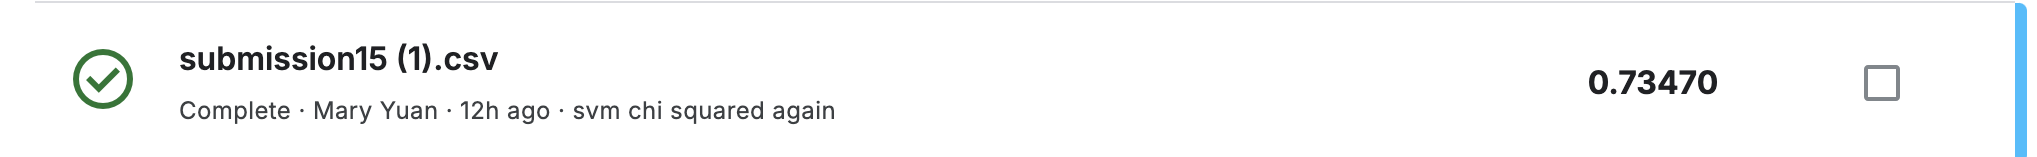

<h2>Part 3: Kaggle Submission</h2><p>
You need to generate a prediction CSV using the following cell from your trained model and submit the direct output of your code to Kaggle. The results should be presented in two columns in csv format: the first column is the data id (0-14999) and the second column includes the predictions for the test set. The first column must be named id and the second column must be named label (otherwise your submission will fail). A sample predication file can be downloaded from Kaggle for each problem.
We provide how to save a csv file if you are running Notebook on Kaggle.

In [ ]:
id = range(15000)
prediction = range(15000)
submission = pd.DataFrame({'id': id, 'label': prediction})
submission.to_csv('/kaggle/working/submission.csv', index=False)

In [ ]:
#submission template that we followed
id = range(15000)

# replace the model as needed
prediction = sv_model2.predict(test_text_scaled_chi)
submission = pd.DataFrame({'id': id, 'label': prediction})

submission.to_csv('/kaggle/working/submission.csv', index=False)

<h2>Part 4: Resources and Literature Used</h2><p>

Please cite the papers and open resources you used.

https://www.intodeeplearning.com/bert-multiclass-text-classification/ for BERT implementation

https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html

https://www.atmosera.com/blog/multiclass-classification-with-neural-networks/

https://towardsdatascience.com/multi-class-text-classification-with-deep-learning-using-bert-b59ca2f5c613

https://scikit-learn.org/1.5/modules/generated/sklearn.svm.LinearSVC.html

https://www.analyticsvidhya.com/blog/2023/06/step-by-step-bert-implementation-guide/